In [10]:
import numpy as np
import matplotlib.pylab as plt
import math

sem = 0
def congruencial_mixto(cantidad=10, a=6364136223846793005, c=1442695040888963407, m=(2 ** 64)):
    global sem
    numeros = []
    xo = sem
    a = a
    c = c
    m = m
    aXi = ( ((a * xo) + c) % m)
    numeros.append(aXi/m)
    sem = aXi
    con = 0
    while (con < cantidad-1):
        aXi = (((a * aXi) + c) % m)
        numeros.append(aXi/m)
        sem = aXi
        con = con + 1 
    return numeros

In [11]:
from matplotlib.pylab import hist, show
print ("Introduzca el numero n de valores uniformes del intervalo (0,1) y la cantidad de intervalos k: -> n k")
n, k = map(int, input().split())
X = []
PX = []

numeros = congruencial_mixto(cantidad=n)
h = hist(numeros, k, (0,1))
show()
count = h[0]
ranges = h[1]
con = 0
for element in count:
    print (ranges[con],"-",ranges[con+1],":",int(element))
    
    
    con = con + 1

Introduzca el numero n de valores uniformes del intervalo (0,1) y la cantidad de intervalos k: -> n k


StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

<p>test de rachas usando el generador de números de numpy y los resultados al ejecutarlo</p>

In [16]:
def rachas(nAletorios):
    num = nAletorios
    rachas = []
    for i in range(0, len(num)-1):
        if num[i+1]>num[i]:
            rachas.append(1)
        else:
            rachas.append(0)
    numRachas = 0
    for i in range(1, len(rachas)-1):
        if rachas[i+1] != rachas[i]:
            numRachas += 1
    n = len(num)
    z = (numRachas - ((2*n - 1)/float(3))) / (math.sqrt((16*n-29)/float(90)))
    # se retorna el valor absoluto del valor de z y también el numero de rachas que presentó
    # el vector de numeros aleatorios que se pasó por parametro
    return (abs(z), numRachas) 
    

generadores = {'RANDU': [65539,0, 2 ** 31], 
               'Sinclair ZX81':[75,0, (2 ** 16) + 1], 
               'Numerical reciepes':[1664525, 1013904223, 2 ** 32], 
               'Borland': [22695477, 1, 2 ** 32],
               'Implementado': [6364136223846793005, 1442695040888963407, (2 ** 64)]
              }
print ("nueva semilla",sem)
n = 1000
numTest = 1000
result = [None]*numTest
print ("Generador Numpy")
for i in range (0, numTest):
    numAleatorios = np.random.uniform(0,1,n)
    result[i] = rachas(numAleatorios)
# print (result)
con = 0
Zamedios = 1.96
# print (result)
for i in result:
    if i[0]>Zamedios:
        #print ("rechazado", i)
        con = con + 1
print ('rechazados',con)

for i in generadores:
    result = [None]*numTest
    print (i, generadores['{}'.format(i)])
    for incremento in range (0, numTest):
        numAleatorios = congruencial_mixto(n, a=generadores['{}'.format(i)][0], 
                                           c=generadores['{}'.format(i)][1], m=generadores['{}'.format(i)][2]
                                          )
        result[incremento] = rachas(numAleatorios)
    # print (result)
    con = 0
    #print (result)
    for valZ in result:
        if valZ[0]>Zamedios:
            con = con + 1
    print ('Rechazados', con)
    print ("nueva semilla",sem)

nueva semilla 17748710511409618632
Generador Numpy


rechazados 45
RANDU [65539, 0, 2147483648]


Rechazados 55
nueva semilla 925812424
Sinclair ZX81 [75, 0, 65537]


Rechazados 57
nueva semilla 29663
Numerical reciepes [1664525, 1013904223, 4294967296]


Rechazados 49
nueva semilla 1100525087
Borland [22695477, 1, 4294967296]


Rechazados 50
nueva semilla 2075343583
Implementado [6364136223846793005, 1442695040888963407, 18446744073709551616]


Rechazados 60
nueva semilla 15093041357588768031


<h1><center>TEST DE $X^2$</center></h1>
<blockquote><p>Se implementa test de ${X}^2$ y se le hace la prueba a un generador de números pseudoaleatorios y luego a otros 3 propuestos en el enunciado del taller.</p></blockquote>

In [5]:
def test_chi_cuadrado(k=100, n=2000, num=None):
    if num is None:
        print ("Se genera numeros aleatorios")
        num = congruencial_mixto(n)
        
    # print ("Números pseudoaleatorios generados")
    # print (num)
    l_intervalo = float(len(num))/float(k)
    count, bins, ignored = plt.hist(num, k, normed=False)
    fi = count
    x_2 = 0.0
    for t in range(1, k+1):
        x_2 = x_2 + (float((float(fi[t-1])-l_intervalo)**2)/l_intervalo)
    return x_2

generadores = {'RANDU': [65539,0, 2 ** 31], 
               'Sinclair ZX81':[75,0, (2 ** 16) + 1], 
               'Numerical reciepes':[1664525, 1013904223, 2 ** 32], 
               'Borland': [22695477, 1, 2 ** 32],
               'Implementado': [6364136223846793005, 1442695040888963407, (2 ** 64)]
              }
print ("nueva semilla",sem)
n = 2000
numTest = 1
result = [None]*numTest
print ("Generador Numpy")
for i in range (0, numTest):
    numAleatorios = np.random.uniform(0,1,n)
    estimado = test_chi_cuadrado(k=100, n=2000, num=numAleatorios)
    print ("Estimado hallado en el test de x^2->%g"%estimado)
# print (result)

for i in generadores:
    result = [None]*numTest
    print (i, generadores['{}'.format(i)])
    for incremento in range (0, numTest):
        numAleatorios = congruencial_mixto(n, a=generadores['{}'.format(i)][0], 
                                           c=generadores['{}'.format(i)][1], m=generadores['{}'.format(i)][2]
                                          )
        estimado = test_chi_cuadrado(k=100, n=2000, num=numAleatorios)
        print ("Estimado hallado en el test de x^2->%g"%estimado)
    print ("nueva semilla",sem)
print ("Se hace la prueba con k=100 y n=2000")
estimado = test_chi_cuadrado(k=100,n=2000)
print ("Estimado hallado en el test de x^2->%g"%estimado)

nueva semilla 13914182575551574262
Generador Numpy


Estimado hallado en el test de x^2->90.1
RANDU [65539, 0, 2147483648]


Estimado hallado en el test de x^2->99.8
nueva semilla 385870454
Sinclair ZX81 [75, 0, 65537]


Estimado hallado en el test de x^2->104.4
nueva semilla 36794
Numerical reciepes [1664525, 1013904223, 4294967296]


Estimado hallado en el test de x^2->66.1
nueva semilla 548671306
Borland [22695477, 1, 4294967296]


Estimado hallado en el test de x^2->107.5
nueva semilla 324460922
Implementado [6364136223846793005, 1442695040888963407, 18446744073709551616]


Estimado hallado en el test de x^2->82.3
nueva semilla 17644928252911026954
Se hace la prueba con k=100 y n=2000
Se genera numeros aleatorios


Estimado hallado en el test de x^2->90.4


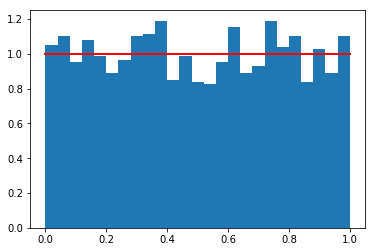

ValueError: operands could not be broadcast together with shapes (2000,) (100,) 

In [7]:
%matplotlib inline 

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

N = 100
# Teoretical CDF for Uniform distribution F(x)
u = [1.0] * N
#print(u)

# Gerate random numbers with Uniform distribution f(x)
#np.random.seed(123456789)
x = congruencial_mixto(n)

# Plot empirical distribution f(x)
count, bins, ignored = plt.hist(x, 25, normed=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()
x1 = np.arange(1/float(N),1+1/float(N),1/float(N))
y1 = np.cumsum(np.sort(u)/np.max(np.cumsum(u)))

x2 = np.sort(x)
y2 = np.cumsum(np.sort(x)/np.max(np.cumsum(x)))

De=np.absolute(y2-y1)
#print(D)
print("De = ",np.max(De))

# Plotting
plt.plot(x1,y1,label='Uniform')
plt.step(x2,y2,label='Random')
x3 = [x1[De.argmax()],x1[De.argmax()]]
y3 = [np.min([y1[De.argmax()],y2[De.argmax()]]),np.max([y1[De.argmax()],y2[De.argmax()]])]
plt.step(x3,y3,label='D')

#plt.plot(x1,De,label='De')

plt.legend()
plt.xlabel('X')
plt.ylabel('Cumulative Probability P(X)')
#plt.title('arbitrary')
#plt.xscale('log')
#plt.yscale('log')

#plt.xlim(0, np.max([np.max(whitney),np.max(redwell)])+0.05)
plt.ylim(0, 1.05)

plt.show()

# scipy function for K-S test
from scipy import stats
D,pvalue = stats.kstest(y2, 'uniform')
print("D = ", D)
print("p-value = ", pvalue)